# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: Никишкина Евгения

Дата выдачи: <span style="color:red">__28 февраля 17:00__</span>.

Мягкий дедлайн: <span style="color:red">__14 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2023`

In [1]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma$ и $\delta$ в нем — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__  
$d(\mathcal{L}(y)) = (\nabla_{y} \mathcal{L})^Td(y)$  
Пусть $\mathbb{I} \in \mathbb{R}^{n \times 1}$, $y = \gamma \tilde{y} + \mathbb{I} \delta$  
$d(\mathcal{L}(y)) = (\nabla_{y} \mathcal{L})^Td(\gamma \tilde{y} + \mathbb{I} \delta) = (\nabla_{y} \mathcal{L})^Td(\gamma \tilde{y}) + (\nabla_{y} \mathcal{L})^T d(\mathbb{I} \delta) = (\nabla_{y} \mathcal{L})^Td(\gamma) \tilde{y} + (\nabla_{y} \mathcal{L})^T\gamma d(\tilde{y}) + (\nabla_{y} \mathcal{L})^T \mathbb{I}d(\delta) = (\tilde{y}^T\nabla_{y} \mathcal{L})^T d(\gamma) + \gamma (\nabla_{y} \mathcal{L})^T d(\tilde{y}) + (\mathbb{I}^T \nabla_{y} \mathcal{L})^T d(\delta) \Rightarrow 
\boxed{ \nabla_{\gamma} \mathcal{L} = \tilde{y}^T\nabla_{y} \mathcal{L}}, \boxed{\nabla_{\delta} \mathcal{L} = \mathbb{I}^T \nabla_{y} \mathcal{L}}, \nabla_{\tilde{y}} \mathcal{L} = \gamma \nabla_{y} \mathcal{L}$      
 
$\nabla_{X} \mathcal{L} = \nabla_{X} \mathcal{\tilde{y}} \nabla_{\tilde{y}} \mathcal{L} $  
$d(\tilde{y}) = d(\frac{X - \mathbb{I}\mu}{\sqrt{\sigma^2 + \varepsilon}}) = \frac{d(X - \mathbb{I}\mu)\sqrt{\sigma^2 + \varepsilon} - (X - \mathbb{I}\mu)d(\sqrt{\sigma^2 + \varepsilon})}{\sigma^2 + \varepsilon} = \frac{(d(X) - \mathbb{I}d(\mu))\sqrt{\sigma^2 + \varepsilon} - (X - \mathbb{I}\mu)\frac{1}{2\sqrt{\sigma^2 + \varepsilon}}d(\sigma^2 + \varepsilon)}{\sigma^2 + \varepsilon} = \frac{(d(X) - \mathbb{I}d(\frac{1}{n}\mathbb{I}^T X))\sqrt{\sigma^2 + \varepsilon} - (X - \mathbb{I}\mu)\frac{1}{2\sqrt{\sigma^2 + \varepsilon}}d(\sigma^2)}{\sigma^2 + \varepsilon} = \frac{(d(X) - \frac{1}{n}\mathbb{I}\mathbb{I}^Td(X))\sqrt{\sigma^2 + \varepsilon} - (X - \mathbb{I}\mu)\frac{1}{2\sqrt{\sigma^2 + \varepsilon}}d(\sigma^2)}{\sigma^2 + \varepsilon}$  
Примечание: $d(\sigma^2) = d(\frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2) = \frac{1}{n} d(\lVert X - \mathbb{I} \mu\rVert ^2) = \frac2n (X - \mathbb{I} \mu)^Td(X - \mathbb{I} \mu) = \frac2n (X - \mathbb{I} \mu)^T(d(X) - \mathbb{I} d(\mu)) = \frac2n (X - \mathbb{I} \mu)^T(d(X) - \frac1n\mathbb{I}\mathbb{I}^Td(X))$   
$d(\tilde{y}) = \frac{(I - \frac{1}{n}\mathbb{I}\mathbb{I}^T)d(X)\sqrt{\sigma^2 + \varepsilon} - (X - \mathbb{I}\mu)\frac{1}{2\sqrt{\sigma^2 + \varepsilon}}\frac2n (X - \mathbb{I} \mu)^T(I - \frac1n\mathbb{I}\mathbb{I}^T)d(X)}{\sigma^2 + \varepsilon} = [J_n$ - квадратная матрица единиц размера $n]= (\frac{I}{\sqrt(\sigma^2 + \varepsilon)} - \frac{(X - \mathbb{I}\mu)(X - \mathbb{I}\mu)^T}{n(\sigma^2 + \varepsilon)^{\frac32}})(I-\frac1n J_n)d(X) \Rightarrow \boxed{\nabla_{X} \mathcal{L} = \gamma (I-\frac1n J_n) (\frac{I}{\sqrt(\sigma^2 + \varepsilon)} - \frac{(X - \mathbb{I}\mu)(X - \mathbb{I}\mu)^T}{n(\sigma^2 + \varepsilon)^{\frac32}}) \nabla_{y} \mathcal{L}}$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями;
9. Все компоненты $\frac{\partial L}{\partial x^{l}}$  и все компоненты $\frac{\partial x^{l}}{\partial y^{l-1}}$ независимы друг от друга;
10. Все компоненты $\frac{\partial L}{\partial y^{l}}$  и все компоненты $\frac{\partial y^{l}}{\partial x^{l}}$ независимы друг от друга.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

Докажем, что $\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$. Из того, что все компоненты в $W^l$ имеют конечное матожидание следует, что интеграл сходится абсолютно, то есть $\int\limits_{-\infty}^{+\infty} |x| p_{W^l}(x)dx < \infty$. $\mathbb{E} W^l_{ij} = \int\limits_{-\infty}^{+\infty}x p_{W^l_{ij}}(x)dx = \int\limits_{-\infty}^{0}x p_{W^l_{ij}}(x)dx + \int\limits_{0}^{+\infty}x p_{W^l_{ij}}(x)dx = \{t = -x\} = -\int\limits_{+\infty}^{0}(-t) p_{W^l_{ij}}(-t)dt + \int\limits_{0}^{+\infty}x p_{W^l_{ij}}(x)dx = -\int\limits_{0}^{+\infty}t p_{W^l_{ij}}(t)dt + \int\limits_{0}^{+\infty}x p_{W^l_{ij}}(x)dx = 0$.  

Докажем, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения. $y^l$ имеют нулевое среднее, так как $\mathbb{E} y^l = \mathbb{E} y^l_{i} = \mathbb{E} (\sum_{j=1}^{n_l}W_{ij}^l x_j^l + b_i^l) = \{b_l$ инициализирован нулями$\} =  \sum_{j=1}^{n_l} \mathbb{E} W_{ij}^l \mathbb{E} x_j^l = 0$.$y^l$ имеют четную плотность распределения, так как $F_{\xi\eta}(z) = \mathbb{P} (\xi\eta <= z) = \iint \limits_{\xi\eta <= z} p_{\xi\eta}(x, y)dxdy = \iint \limits_{\xi\eta <= z} p_{\xi}(x)p_{\eta}(y)dxdy = \int \limits_{-\infty}^{0} [\int\limits_{\frac{z}{x}}^{+\infty} p_{\xi}(x)p_{\eta}(y)dy] dx + \int \limits_{0}^{+\infty} [\int\limits_{-\infty}^{\frac{z}{x}} p_{\xi}(x)p_{\eta}(y)dy] dx = F_y(z) \Rightarrow \frac{\partial F_y(z)}{\partial z} = \frac{\partial }{\partial z} \int \limits_{-\infty}^{0} [\int\limits_{\frac{z}{x}}^{+\infty} p_{\xi}(x)p_{\eta}(y)dy] dx + \frac{\partial }{\partial z} \int \limits_{0}^{+\infty} [\int\limits_{-\infty}^{\frac{z}{x}} p_{\xi}(x)p_{\eta}(y)dy] dx = \int \limits_{-\infty}^{0} p_{\xi}(x) [\frac{\partial }{\partial z} \int\limits_{\frac{z}{x}}^{+\infty} p_{\eta}(y)dy] dx + \int \limits_{0}^{+\infty} p_{\xi}(x) [\frac{\partial }{\partial z} \int\limits_{-\infty}^{\frac{z}{x}} p_{\eta}(y)dy] dx = \{$формула Ньютона - Лейбница: $\frac{\partial }{\partial z} \int\limits_{-\infty}^{\frac{z}{x}} p_{\eta}(y)dy = -p_{\eta}(\frac{z}{x})\frac1x \} = -\int \limits_{-\infty}^{0} p_{\xi}(x)p_{\eta}(\frac{z}{x})\frac1x dx + \int \limits_{0}^{+\infty} p_{\xi}(x) p_{\eta}(\frac{z}{x})\frac1x dx = \int \limits_{-\infty}^{+\infty} p_{\xi}(x) p_{\eta}(\frac{z}{x})\frac{1}{|x|} dx \Rightarrow p_{y^l}(y) = \int \limits_{-\infty}^{+\infty} p_{x^l}(x) p_{W^l}(\frac{y}{x})\frac{1}{|x|} dx = \int \limits_{-\infty}^{+\infty} p_{x^l}(x) p_{W^l}(-\frac{y}{x})\frac{1}{|x|} dx = p_{y^l}(-y)$.

**Прямой проход**   

Воспользуемся тем, что для независимых случайных величин X, Y верно $\mathbb{D} XY = \mathbb{D} X \mathbb{D} Y + \mathbb{D} X (\mathbb{E} Y)^2 + \mathbb{D} Y (\mathbb{E} X)^2$   

$\mathbb{D}y^{l} = \mathbb{D}y^{l}_{i} = \mathbb{D} (\sum_{j=1}^{n_l}W_{ij}^l x_j^l) = \sum_{j=1}^{n_l} \mathbb{D}(W_{ij}^l x_j^l) = \sum_{j=1}^{n_l} (\mathbb{D} W_{ij}^l \mathbb{D} x_j^l + \mathbb{D} W_{ij}^l (\mathbb{E} x_j^l)^2 + (\mathbb{E} W_{ij}^l)^2 \mathbb{D} x_j^l) = \sum_{j=1}^{n_l} (\mathbb{D} W_{ij}^l \mathbb{D} x_j^l + \mathbb{D} W_{ij}^l (\mathbb{E} x_j^l)^2) = \sum_{j=1}^{n_l} \mathbb{D} W_{ij}^l \mathbb{E} (x_j^l)^2 = n_l\mathbb{D} W_{ij}^l \mathbb{E} (x_j^l)^2$

Причем $\mathbb{E} (x_j^l)^2 = \mathbb{E} (g(y^{l-1}))^2 = \int\limits_{-\infty}^{+\infty} (g(t))^2 p_{y^{l-1}}(t)dt = \{g(y) = max(0, y)\} = \int\limits_{0}^{+\infty} t^2 p_{y^{l-1}}(t)dt = \frac{1}{2} \int\limits_{-\infty}^{+\infty} t^2 p_{y^{l-1}}(t)dt = \frac{1}{2} \mathbb{E} (y^{l-1})^2$. Тогда $\mathbb{D}y^{l} = n_l\mathbb{D} W^l \mathbb{E} (x_j^l)^2 = n_l\mathbb{D} W^l \frac{1}{2} \mathbb{E} (y^{l-1})^2$, а с другой стороны $\mathbb{D}y^{l-1} = \mathbb{E}(y^{l-1})^2 - (\mathbb{E}y^{l-1})^2 = \mathbb{E}(y^{l-1})^2 \Rightarrow \mathbb{D}y^{l} = \frac{n_l}{2}\mathbb{D} W^l \mathbb{D} (y^{l-1}) \Rightarrow \mathbb{D}y^{l} = \mathbb{D}y^{l-1} \Leftrightarrow \frac{n_l}{2}\mathbb{D} W^l = 1 \Leftrightarrow \mathbb{D} W^l = \frac{2}{n_l}$

**Обратный проход**  

$\delta^{l-1}_{j} = \sum_{k=1}^{n_l}\delta^{l}_{k}\frac{\partial y^{l}_{k}}{\partial y^{l-1}_{j}} = \sum_{k=1}^{n_l}\delta^{l}_{k}\frac{\partial }{\partial y^{l-1}_{j}}\sum_{i=1}^{n_{l-1}}W^{l}_{ki}g(y^{l-1}_{i}) = \sum_{k=1}^{n_l}\delta^{l}_{k}W^{l}_{kj}\frac{\partial g(y^{l-1}_j)}{\partial y^{l-1}_j} = \sum_{k=1}^{n_l}\delta^{l}_{k}W^{l}_{kj}g^{\prime}(y^{l-1}_{j}) \Rightarrow \frac{\partial L}{\partial y_i^{l - 1}} = \sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l g^{\prime}(y^{l-1}_{i}) = [y^{l-1}_{i} > 0] \sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l$ 

$\mathbb{E} \frac{\partial L}{\partial y_i^{l - 1}} = \mathbb{E} ([y^{l-1}_{i} > 0] \sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l)= \mathbb{E} [y^{l-1}_{i} > 0] \mathbb{E} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) = \mathbb{P}(y^{l-1}_{i} > 0) \sum_{j=1}^{n_l} \mathbb{E} \frac{\partial L}{\partial y_j^{l}} \mathbb{E} W_{ji}^l = \frac{n_l}{2} \mathbb{E} \frac{\partial L}{\partial y^{l}} \mathbb{E} W^l = 0$

$\mathbb{D} \frac{\partial L}{\partial y_i^{l - 1}} = \mathbb{D} ([y^{l-1}_{i} > 0] \sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) = \mathbb{D} [y^{l-1}_{i} > 0]\mathbb{D} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) + \mathbb{D} [y^{l-1}_{i} > 0] (\mathbb{E} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l))^2 + (\mathbb{E} [y^{l-1}_{i} > 0])^2 \mathbb{D} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) = \{\mathbb{E}[y^{l-1}_{i} > 0] = \mathbb{E}[y^{l-1}_{i} > 0]^2 = \frac12; \mathbb{D}[y^{l-1}_{i} > 0] = \frac12 - \frac14 = \frac14\} = \frac14 \mathbb{D} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) +\frac14 (\mathbb{E} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l))^2 + \frac14 \mathbb{D} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) = \frac12\mathbb{D} (\sum_{j=1}^{n_l} \frac{\partial L}{\partial y_j^{l}} W_{ji}^l) = \frac12 \sum_{j=1}^{n_l} \mathbb{D} (\frac{\partial L}{\partial y_j^{l}} W_{ji}^l) = \frac12 \sum_{j=1}^{n_l} (\mathbb{D} \frac{\partial L}{\partial y_j^{l}} \mathbb{D} W_{ji}^l + \mathbb{D} \frac{\partial L}{\partial y_j^{l}} (\mathbb{E} W_{ji}^l)^2 + (\mathbb{E} \frac{\partial L}{\partial y_j^{l}})^2 \mathbb{D} W_{ji}^l) = \frac{n_l}{2} \mathbb{D} \frac{\partial L}{\partial y^{l}} \mathbb{D} W^l \Rightarrow \mathbb{D} \frac{\partial L}{\partial y^{l - 1}} = \mathbb{D} \frac{\partial L}{\partial y^{l}} \Leftrightarrow \frac{n_l}{2} \mathbb{D} W^l = 1 \Leftrightarrow \mathbb{D} W^l = \frac{2}{n_l}$

В качестве искомого распределения можно выбрать следующие варианты:
$$ W^{L}_{ij} \sim \mathcal{N}(0, \frac{2}{n^l})$$
$$ W^{L}_{ij} \sim \mathcal{U}[-\sqrt{\frac{6}{n^{n^l}}}, \sqrt{\frac{6}{n^l}}]$$


### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

* Производная сигмоиды всюду меньше $1$, так как она равна $\sigma(y)*(1 - \sigma(y))$. Это приводит к тому, что более глубокие слои обучаются медленнее, так как увеличение или уменьшение аргумента функции вносит малые изменения, и градиент становится все меньше, то есть при использовании такой функции активации велика вероятность затухания градиентов и медленной сходимости параметров глубоких слоёв сети. В то время, как значение производной у $ReLU(y) = \max(0, y)$ равно 1 ($y >= 0$) и 0 ($y < 0$), и на положительной полуоси функция не насыщается, то есть проблема затухания градиентов на положительной полуоси отсутствует.

* Функция $ReLU(y)$ и ее производная значительно проще для вычисления, чем использование сигмоиды, требуещей подсчета экспоненты.

* Сигмоида может уменьшать дисперсию активаций, так как она определяет сжимающее отображение, что может привести к тому, что активации последних слоёв будут распределены в маленьком подпространстве.


---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.input = input
        return np.maximum(0, input)
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return  grad_output * (self.input > 0), [] 
    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [4]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [5]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        ### your code here
        self.input = input
        return input @ self.weights + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]  
        """
        grad_w = self.input.T @ grad_output
        grad_b = np.ones((1, grad_output.shape[0])) @ grad_output
        return grad_output @ self.weights.T, np.r_[grad_w.ravel(), grad_b.ravel()]
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [6]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке: 

$d(f(y)) =  d(\sum_i y_i) = \sum_i d(y_i) = \sum_i [x_i > 0]dx_i = \langle [x > 0], dx \rangle \Rightarrow \nabla_{x} \mathcal{f} = [x > 0]$ 


Следующая ячейка после заполнения должна не выдавать ошибку :)

In [7]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

grads = [points > 0]
numeric_grads = eval_numerical_gradient(lambda x: relu.forward(x).sum(), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

Пусть единичный вектор $\mathbb{I_1} \in \mathbb{R}^{1 \times {output\_units}}$, единичный вектор $\mathbb{I_2} \in \mathbb{R}^{batch \times 1}$, $d(f(y)) = d(\mathbb{I_1} y\mathbb{I_2}) = \mathbb{I_1}dy\mathbb{I_2} = tr(\mathbb{I_1}dy\mathbb{I_2}) = tr(\mathbb{I_2}\mathbb{I_1}dy) = \langle(\mathbb{I_2}\mathbb{I_1})^T, dy\rangle = \langle J_{{output\_units}, batch}, Wdx\rangle = tr(J_{{output\_units}, batch}^TWdx) = tr((W^TJ_{{output\_units}, batch})^Tdx) = \langle W^TJ_{{output\_units}, batch}, dx \rangle \Rightarrow \nabla_{x} \mathcal{f} = W^TJ_{{output\_units}, batch}$, где $J_{{output\_units}, batch} = (\mathbb{I_2}\mathbb{I_1})^T$  - единичная матрица размера $[{output\_units}, batch]$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [8]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])
 
grads = (linear.weights @ np.ones((linear.weights.shape[1], points.shape[0]))).T
numeric_grads = eval_numerical_gradient(lambda x: linear.forward(x).sum(), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

In [9]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [10]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.output = input - logsumexp(input, axis=1, keepdims=True)
        return self.output
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        return grad_output - grad_output.sum(axis=1, keepdims=True) * np.exp(self.output), []
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [11]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    return -activations[np.arange(activations.shape[0]), target].mean()


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    grad = np.zeros(activations.shape)
    grad[np.arange(activations.shape[0]), target] = -1 / (activations.shape[0])
    return grad

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [12]:
lsm = LogSoftmax()
target = np.arange(10)
points = np.linspace(-1, 1, 10 * 12).reshape([10, 12])

grads, _ = lsm.backward(grad_NLL(lsm.forward(points), target))
numeric_grads = eval_numerical_gradient(lambda x: NLL(lsm.forward(x), target), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [14]:
from sklearn.datasets import load_digits

In [15]:
X, y = load_digits(return_X_y=True)

In [16]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (1 балл)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [20]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [21]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [22]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    for layer in network:
        X = layer.forward(X)
    return X

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [23]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    return forward(network, X).argmax(axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [24]:
from scipy.optimize import minimize

In [25]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [26]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [27]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    output = forward(network, X)
    loss = NLL(output, y)
    grads = grad_NLL(output, y)
    gradient = []
    for layer in network[::-1]:
        grads, params = layer.backward(grads)
        gradient.append(params)
    return loss, np.concatenate(gradient[::-1])

Теперь мы готовы обучать нашу нейросеть. 

In [28]:
weights = get_weights(network)

In [29]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [30]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [31]:
res["nit"] # number of iterations (should be >> 10)

113

In [32]:
res["success"] # should be True

True

In [33]:
res["x"] # leraned weights

array([ 0.00168355,  0.00430779, -0.00990674, ..., -0.59811819,
       -1.23763272, -0.08524029])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [34]:
print(f'Train accuracy: {(predict(network, X_train) == y_train).mean():.4f}')
print(f'Test accuracy: {(predict(network, X_test) == y_test).mean():.4f}')

Train accuracy: 1.0000
Test accuracy: 0.9622


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [35]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        self.train_acc.append((predict(self.network, self.X_train) == self.y_train).mean())
        for layer in self.network:
            layer.eval = True
        self.test_acc.append((predict(self.network, self.X_test) == self.y_test).mean())
        for layer in self.network:
            layer.eval = False
        if self.print:
            print(f'Train accuracy: {self.train_acc[-1]:.4f}')
            print(f'Test accuracy: {self.test_acc[-1]:.4f}')

In [36]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Train accuracy: 0.1232
Test accuracy: 0.1067
Train accuracy: 0.1032
Test accuracy: 0.0956
Train accuracy: 0.1032
Test accuracy: 0.0956
Train accuracy: 0.1032
Test accuracy: 0.0956
Train accuracy: 0.2027
Test accuracy: 0.1911
Train accuracy: 0.2977
Test accuracy: 0.2733
Train accuracy: 0.3014
Test accuracy: 0.2778
Train accuracy: 0.2806
Test accuracy: 0.2511
Train accuracy: 0.2702
Test accuracy: 0.2422
Train accuracy: 0.3497
Test accuracy: 0.3200
Train accuracy: 0.4024
Test accuracy: 0.3600
Train accuracy: 0.5100
Test accuracy: 0.4778
Train accuracy: 0.5798
Test accuracy: 0.5578
Train accuracy: 0.6392
Test accuracy: 0.6156
Train accuracy: 0.6540
Test accuracy: 0.6511
Train accuracy: 0.6585
Test accuracy: 0.6489
Train accuracy: 0.6756
Test accuracy: 0.6689
Train accuracy: 0.6778
Test accuracy: 0.6822
Train accuracy: 0.6964
Test accuracy: 0.6889
Train accuracy: 0.7350
Test accuracy: 0.7089
Train accuracy: 0.7142
Test accuracy: 0.7089
Train accuracy: 0.7498
Test accuracy: 0.7533
Train accu

Изобразите на графике кривую качества на обучени и контроле по итерациям:

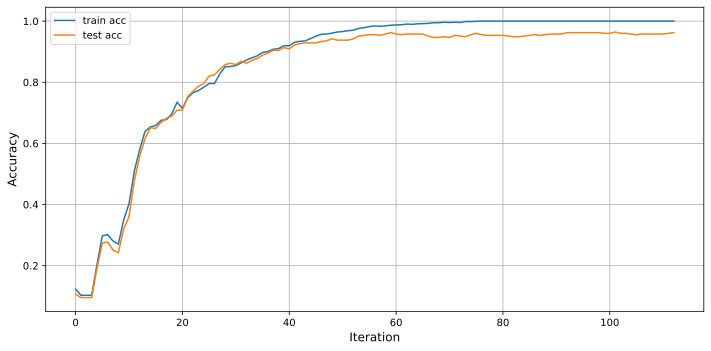

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (1 балл)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [41]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [42]:
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, i + 1, ReLU)
        res = minimize(
            compute_loss_grad, get_weights(network),       
            args=[network, X_train, y_train], 
            method="L-BFGS-B",                
            jac=True                          
        )
        accs_train[i, j] = (predict(network, X_train) == y_train).mean()
        accs_test[i, j] = (predict(network, X_test) == y_test).mean()

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

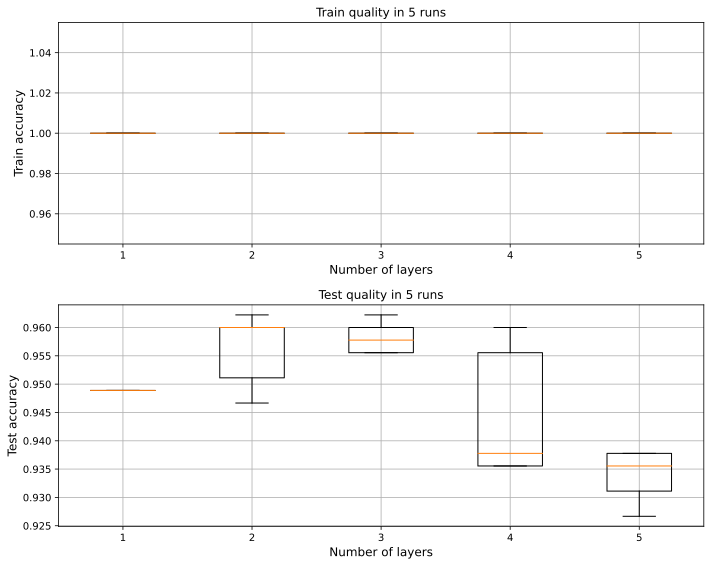

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers", fontsize=12)
axes[1].set_xlabel("Number of layers", fontsize=12)

axes[0].set_ylabel("Train accuracy", fontsize=12)
axes[1].set_ylabel("Test accuracy", fontsize=12)

axes[0].set_title("Train quality in 5 runs", fontsize=12)
axes[1].set_title("Test quality in 5 runs", fontsize=12)

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

* На обучении качество не изменяется с увеличением числа слоев и равно 1, что свидетельствует о том, что модель подстраивается под обучающую выборку. На контроле медианное значение сначала увеличивается, а затем уменьшается, максимум достигается при числе слоев, равном 2. За устойчивость процесса обучения отвечает интерквантильный размах, из графиков видно, что с увеличением числа слоев решение становится менее уйстойчивым.

* Логистическая регрессия - сеть с 1 слоем, из графиков видно, что при числе слоев, равном 2 и 3 точность на контроле выше, что свидетельствует о том, что линейная модель дает качество хуже, чем нелинейная.

### `Эксперименты c различными инициализациями весов (1 балл)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [44]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                layer.weights = np.random.normal(scale=np.sqrt(2 / input_units), size=(input_units, output_units))
            elif initialization == 'Xavier':
                a = np.sqrt(6 / (input_units + output_units))
                layer.weights = np.random.uniform(low=-a, high=a, size=(input_units, output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [45]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [57]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [61]:
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
        initialize_network(network, init_vars[i])
        res = minimize(
            compute_loss_grad, get_weights(network),       
            args=[network, X_train, y_train], 
            method="L-BFGS-B",                
            jac=True                          
        )
        accs_train[i, j] = (predict(network, X_train) == y_train).mean()
        accs_test[i, j] = (predict(network, X_test) == y_test).mean()

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

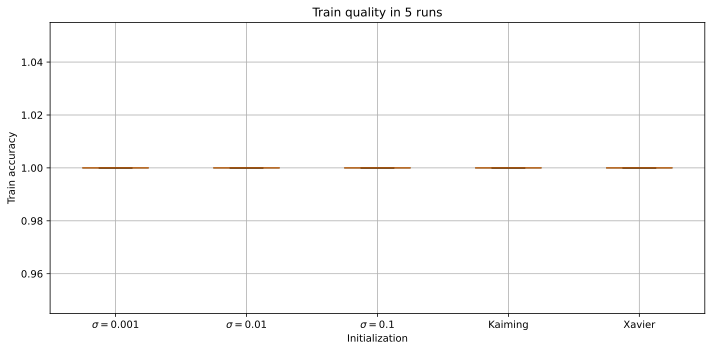

In [62]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_train.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Train quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Train accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

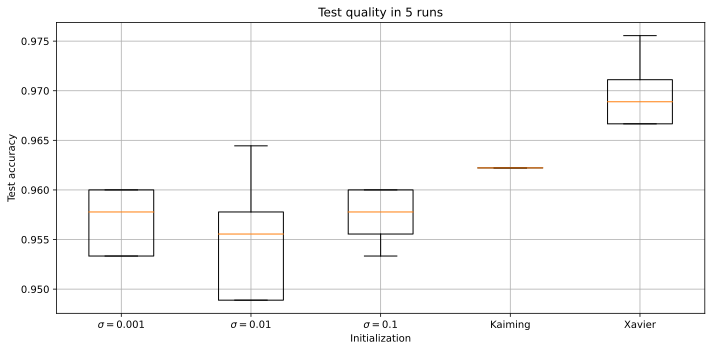

In [63]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [64]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [65]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [66]:
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
        initialize_network(network, init_vars[i])
        res = minimize(
            compute_loss_grad, get_weights(network),       
            args=[network, X_train, y_train], 
            method="L-BFGS-B",                
            jac=True                          
        )
        accs_train[i, j] = (predict(network, X_train) == y_train).mean()
        accs_test[i, j] = (predict(network, X_test) == y_test).mean()

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

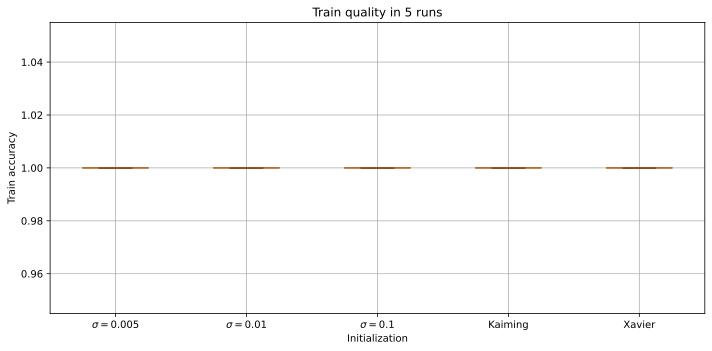

In [67]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_train.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Train quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Train accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

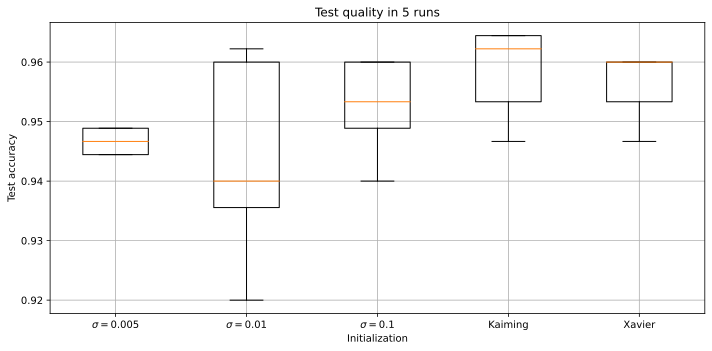

In [68]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [69]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [70]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [71]:
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
        initialize_network(network, init_vars[i])
        res = minimize(
            compute_loss_grad, get_weights(network),       
            args=[network, X_train, y_train], 
            method="L-BFGS-B",                
            jac=True                          
        )
        accs_train[i, j] = (predict(network, X_train) == y_train).mean()
        accs_test[i, j] = (predict(network, X_test) == y_test).mean()

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

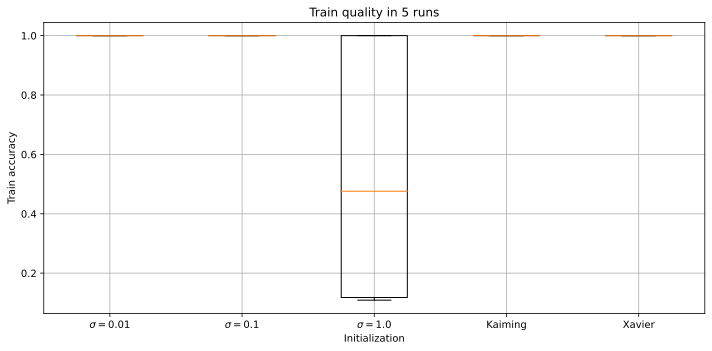

In [72]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_train.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Train quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Train accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

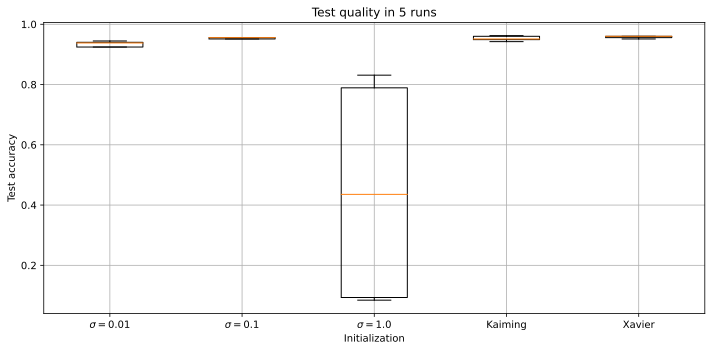

In [73]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

* На обучении качество везде равно 1, за исключения случая: число слоев = 5, $\sigma = 1$, это показывает, что при инициализиции глубокой сети большими весами сходимость не гарантируется. Для числа слоев, равного 3, наибольшая точность на контроле дает инициализация 'Kaiming' и 'Xavier', решения при использовании 'Kaiming' более устойчивые. Для числа слоев, равного 4, наибольшая точность на контроле достигается при инициализации 'Kaiming'. Для числа слоев, равного 5, наибольшая точность - 'Kaiming' и 'Xavier', устойчивость - 'Xavier'. При случайной инициализации с помощью подбора параметра $\sigma$ результаты в среднем получаются хуже. 

* 'Kaiming' и 'Xavier' помогают обучать более глубокие сети, так как позволяют достичь наибольшего качества и демонстрируют устойчивость процесса обучения. В качестве функции активации в данных сетях использовалась ReLu, выше были получены оценки на математическое ожидание и дисперсию, подтверждающие целесобразность использования в качестве инициализации именно 'Kaiming'.

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [74]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [75]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [76]:
for i in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    initialize_network(network, init_vars[i])
    cb = Callback(network, X_train, y_train, X_test, y_test)
    res = minimize(
        compute_loss_grad, get_weights(network),  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train_on_iterations.append(cb.train_acc)
    accs_test_on_iterations.append(cb.test_acc)


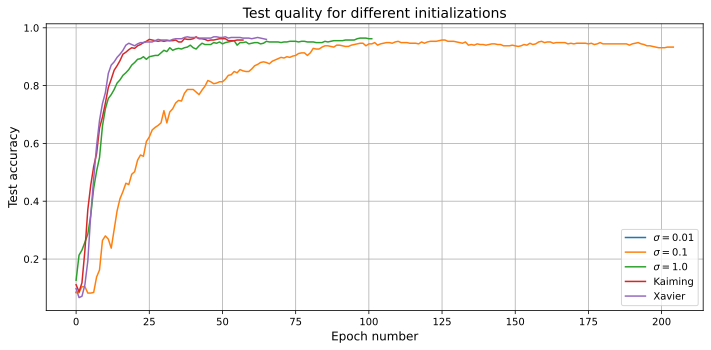

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)

ax.set_title("Test quality for different initializations", fontsize=14)
ax.set_xlabel("Epoch number", fontsize=12)
ax.set_ylabel("Test accuracy", fontsize=12)
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

In [78]:
accs_test_on_iterations[0]

[0.08444444444444445, 0.08444444444444445]

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

Быстрее всего алгоритм сходится при инициализации 'Kaiming', на втором месте 'Xavier'. При $\sigma = 0.1$ алгоритм сходится дольше всего, а при $\sigma = 0.01$ алгоритм совсем не сходится (на первом и втором шаге значения функционала ошибки совпадают, поэтому алгоритм оптимизации завершается).

### `Эксперименты c различными функциями активации (1 балл)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [79]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.output = np.tanh(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (1 - self.output ** 2), []

    def __repr__(self):
        return 'Tanh()'

In [80]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.output = expit(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * self.output * (1 - self.output), []


    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [81]:
act_func_vars = [ReLU, Tanh, Sigmoid]
init_for_act_funcs = ['Kaiming', 'Xavier', 'Xavier']

In [82]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [83]:
for i in range(3):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, 3, act_func_vars[i])
        initialize_network(network, init_for_act_funcs[i])
        res = minimize(
            compute_loss_grad, get_weights(network),       
            args=[network, X_train, y_train], 
            method="L-BFGS-B",                
            jac=True                          
        )
        accs_train[i, j] = (predict(network, X_train) == y_train).mean()
        accs_test[i, j] = (predict(network, X_test) == y_test).mean()

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

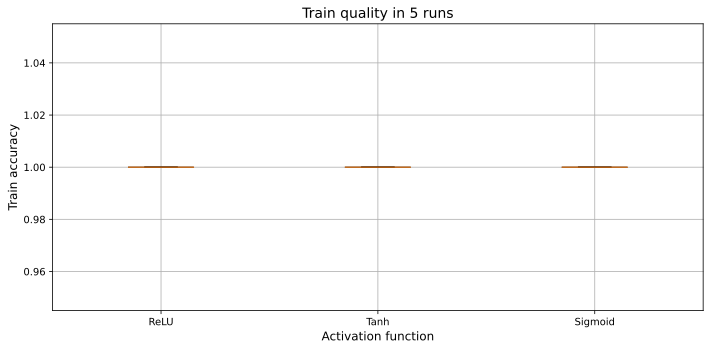

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_train.T, labels=['ReLU', 'Tanh', 'Sigmoid'], showfliers=False)

ax.set_title("Train quality in 5 runs", fontsize=14)
ax.set_xlabel("Activation function", fontsize=12)
ax.set_ylabel("Train accuracy", fontsize=12)
ax.grid(True)

fig.tight_layout()
plt.show()

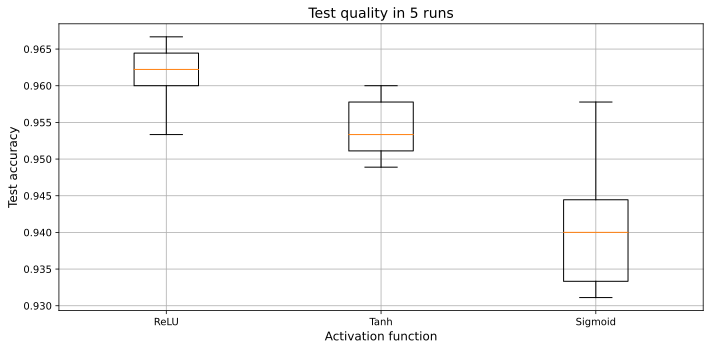

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=['ReLU', 'Tanh', 'Sigmoid'], showfliers=False)

ax.set_title("Test quality in 5 runs", fontsize=14)
ax.set_xlabel("Activation function", fontsize=12)
ax.set_ylabel("Test accuracy", fontsize=12)
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

* На обучении по-прежнему достигается значение точности, равное 1. На контроле наилучшее качество демонстрирует $ReLU$, а наихудшее достигается при использовании сигмоиды, что согласуется с теорией затухания градиента. Устойчивость процесса обучения наилучшая $ReLU$, а наихудшая у сигмоиды.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте сами метод оптимизации (аналог функции `minimize`) для рассмотренной выше архитектуры. В качестве метода оптимизации используйте SGD + momentum. Продемонстрируйте правильную работу метода оптимизации, сравните его работу с LBFGS-B. Сделайте выводы.

In [174]:
def momentum(network, X_train, y_train, X_val, y_val, epoch=100, step_alpha=0.01, step_beta=0.01, batch_size=64, gamma=0.9):
    weights = get_weights(network)
    delta = np.zeros_like(weights)
    train_acc, val_acc  = [], []
    for k in range(epoch):
        ind_per = np.random.permutation(X_train.shape[0])
        for batch_num, i in enumerate(range(0, X_train.shape[0], batch_size)):
            batch = ind_per[i: i + batch_size]
            lr = step_alpha / (batch_num + 1) ** step_beta
            loss, grad = compute_loss_grad(weights, [network, X_train[batch], y_train[batch]])
            delta = gamma * delta + grad
            weights = weights - lr * delta
            set_weights(weights, network)

        train_acc.append((predict(network, X_train) == y_train).mean())
        val_acc.append((predict(network, X_val) == y_val).mean())
    
    return train_acc, val_acc

In [175]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)

In [176]:
t_a, v_a = momentum(network, X_train, y_train, X_test, y_test, epoch=100)

In [177]:
network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
cb = Callback(network, X_train, y_train, X_test, y_test)

res = minimize(
    compute_loss_grad, get_weights(network),  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

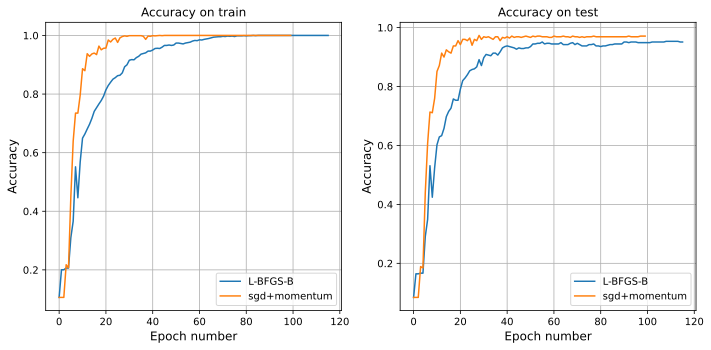

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Accuracy on train', fontsize=12)
ax2.set_title('Accuracy on test', fontsize=12)
ax1.plot(cb.train_acc, label="L-BFGS-B")
ax2.plot(cb.test_acc, label="L-BFGS-B")
ax1.plot(t_a, label="sgd+momentum")
ax2.plot(v_a, label="sgd+momentum")
ax1.set_xlabel("Epoch number", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.grid(True)
ax1.legend()

ax2.set_xlabel("Epoch number", fontsize=12)
ax2.set_ylabel("Accuracy", fontsize=12)
ax2.grid(True)
ax2.legend()

fig.tight_layout()
plt.show()

Как видно из графика выше, при использовании в качестве метода оптимизации SGD + momentum алгоритм сходится за меньше число эпох и позволяет достичь точность на контроле выше, чем в случае с LBFGS-B.

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [179]:
class Dropout:
    def __init__(self, prob):
        self.prob = prob
        self.eval = False
        self.params = []

    def forward(self, input):
        if self.eval:
            return input
        self.mask = np.random.binomial(1, 1 - self.prob, input.shape)
        return self.mask * input / (1 - self.prob)

    def backward(self, grad_output):
        return grad_output * self.mask / (1 - self.prob), []

    def __repr__(self):
        return 'Dropout()'

In [180]:
def make_network_with_dropout(input_size, hidden_layers_size, output_size, n_layers=5, activation_class=ReLU, prob=0.1):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
            network.append(Dropout(prob))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

В качестве оптимизатора будем использовать L-BFGS-B c предварительной инициализацией весов 'Kaiming'.

In [181]:
from tqdm import tqdm
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
test_acc = []
for i in tqdm(range(len(p))):
    network = make_network_with_dropout(input_size, hidden_layers_size, output_size, 5, ReLU, p[i])
    initialize_network(network, 'Kaiming')
    cb = Callback(network, X_train, y_train, X_test, y_test)

    res = minimize(
        compute_loss_grad, get_weights(network),  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    test_acc.append(cb.test_acc)


100%|██████████| 9/9 [00:02<00:00,  4.12it/s]


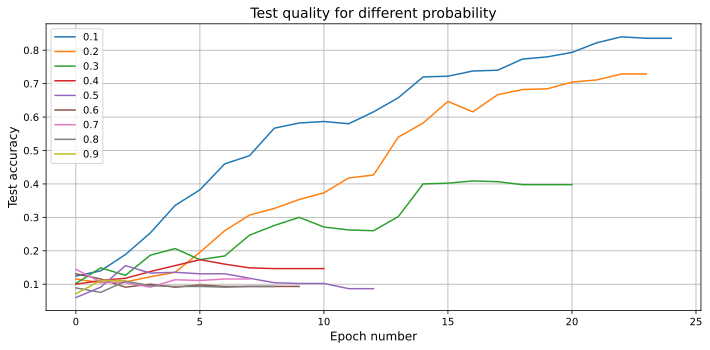

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(p):
    ax.plot(test_acc[idx], label=label)

ax.set_title("Test quality for different probability", fontsize=14)
ax.set_xlabel("Epoch number", fontsize=12)
ax.set_ylabel("Test accuracy", fontsize=12)
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Наилучшая точность на контроле при значении вероятности, равном 0.1.

In [183]:
network = make_network_with_dropout(input_size, hidden_layers_size, output_size, 5, ReLU, 0.1)
initialize_network(network, 'Kaiming')

cb_do = Callback(network, X_train, y_train, X_test, y_test)

res = minimize(
    compute_loss_grad, get_weights(network),  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb_do.call
)

network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
initialize_network(network, 'Kaiming')
cb = Callback(network, X_train, y_train, X_test, y_test)

res = minimize(
    compute_loss_grad, get_weights(network),  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

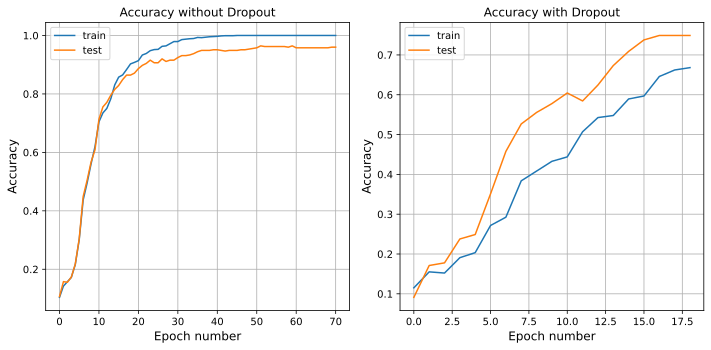

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Accuracy without Dropout', fontsize=12)
ax2.set_title('Accuracy with Dropout', fontsize=12)
ax1.plot(cb.train_acc, label="train")
ax1.plot(cb.test_acc, label="test")
ax2.plot(cb_do.train_acc, label="train")
ax2.plot(cb_do.test_acc, label="test")
ax1.set_xlabel("Epoch number", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.grid(True)
ax1.legend()

ax2.set_xlabel("Epoch number", fontsize=12)
ax2.set_ylabel("Accuracy", fontsize=12)
ax2.grid(True)
ax2.legend()

fig.tight_layout()
plt.show()

Графики выше демонстрируют, что использование Dropout ускорило сходимость алгоритма, однако и точность на обучении, и на контроле оказалась ниже, чем без его использования. Важно отметить, что точность на контроле стала больше точности на обучении, что свидетельствует об отсутствии переобучения.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.

In [190]:
class BatchNorm:
    def __init__(self, num_features, eps=1e-5, momentum=0.9):
        self.eps = eps
        self.momentum = momentum
        self.eval = False
        self.gamma = np.ones((1, num_features))
        self.beta = np.zeros((1, num_features))
        self.moving_mean = np.zeros((1, num_features))
        self.moving_var = np.ones((1, num_features))
        self.num_features = num_features
        self.params = [self.gamma, self.beta]

    def forward(self, input):
        self.input = input
        if self.eval:
            x = (input - self.moving_mean) / np.sqrt(self.moving_var + self.eps)
            return self.gamma * x + self.beta
        self.mean = input.mean(axis=0)
        self.var = ((input - self.mean) ** 2).mean(axis=0)
        x = (input - self.mean) / np.sqrt(self.var + self.eps)
        self.moving_mean = self.momentum * self.moving_mean + (1 - self.momentum) * self.mean
        self.moving_var = self.momentum * self.moving_var + (1 - self.momentum) * self.var
        return self.gamma * x + self.beta

    def backward(self, grad_output):
        n = grad_output.shape[0]
        sigma = np.sqrt(self.var + self.eps)
        dLdg = (grad_output * (self.input - self.mean) / sigma).sum(axis=0)
        dLdb = grad_output.sum(axis=0)

        a = -self.gamma / (n * sigma) * (1 + (n - 1) / n * self.mean ** 2 / sigma ** 2)

        b = self.gamma * (n - 1) / (n ** 2 * sigma ** 3) * self.mean

        dLdx = (a + b * self.input) * grad_output.sum(axis=0) + \
                (self.gamma / sigma - \
                self.gamma / (n * sigma ** 3) * (self.input - self.mean) ** 2) * grad_output

        return dLdx, np.r_[dLdg.ravel(), dLdb.ravel()]


    def __repr__(self):
        return 'BatchNorm()'

In [194]:
def make_network_with_batchnorm(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
            network.append(BatchNorm(hidden_layers_size))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

В качестве оптимизатора будем использовать SGD + momentum c предварительной инициализацией весов 'Kaiming'.

In [204]:
network = make_network_with_batchnorm(input_size, hidden_layers_size, output_size, 5, ReLU)
initialize_network(network, 'Kaiming')
t_a_bn, v_a_bn = momentum(network, X_train, y_train, X_test, y_test, batch_size=128, epoch=100)

network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
initialize_network(network, 'Kaiming')
t_a, v_a = momentum(network, X_train, y_train, X_test, y_test, batch_size=128, epoch=100)

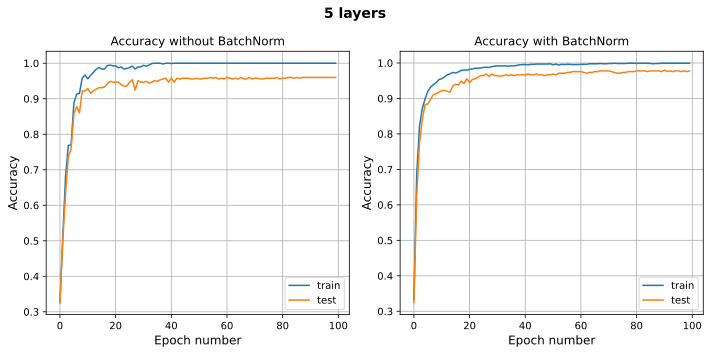

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('5 layers', fontsize=14, weight='bold')
ax1.set_title('Accuracy without BatchNorm', fontsize=12)
ax2.set_title('Accuracy with BatchNorm', fontsize=12)
ax1.plot(t_a, label="train")
ax1.plot(v_a, label="test")
ax2.plot(t_a_bn, label="train")
ax2.plot(v_a_bn, label="test")
ax1.set_xlabel("Epoch number", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.grid(True)
ax1.legend()

ax2.set_xlabel("Epoch number", fontsize=12)
ax2.set_ylabel("Accuracy", fontsize=12)
ax2.grid(True)
ax2.legend()

fig.tight_layout()
plt.show()

In [206]:
network = make_network_with_batchnorm(input_size, hidden_layers_size, output_size, 10, ReLU)
initialize_network(network, 'Kaiming')
t_a_bn, v_a_bn = momentum(network, X_train, y_train, X_test, y_test, batch_size=128, epoch=100)

network = make_network(input_size, hidden_layers_size, output_size, 10, ReLU)
initialize_network(network, 'Kaiming')
t_a, v_a = momentum(network, X_train, y_train, X_test, y_test, batch_size=128, epoch=100)

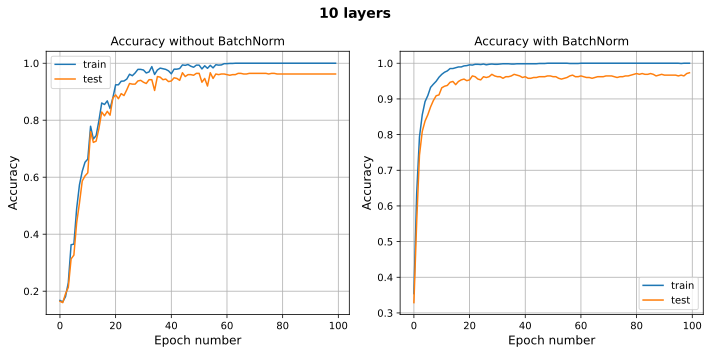

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('10 layers', fontsize=14, weight='bold')
ax1.set_title('Accuracy without BatchNorm', fontsize=12)
ax2.set_title('Accuracy with BatchNorm', fontsize=12)
ax1.plot(t_a, label="train")
ax1.plot(v_a, label="test")
ax2.plot(t_a_bn, label="train")
ax2.plot(v_a_bn, label="test")
ax1.set_xlabel("Epoch number", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.grid(True)
ax1.legend()

ax2.set_xlabel("Epoch number", fontsize=12)
ax2.set_ylabel("Accuracy", fontsize=12)
ax2.grid(True)
ax2.legend()

fig.tight_layout()
plt.show()

* BatchNorm позволяет увеличить скорость обучения, за счет погашения Internal Covariate Shift (ICS) - изменения распределения входных данных слоя нейронной сети в результате изменения параметров модели в процессе тренировки. 
* BatchNorm позволяет уменьшить регуляризацию (подсчет стохастик по случайным батчам), поэтому можно отказаться от использования других методов регуляризации, в частности от рассмотренного ранее Dropout.
* BatchNorm также сглаживает оптимизационную функцию (accuracy более гладко увеличивается, это свидетельствует о сглаживании функции ошибки), позволяя более быстрым темпам обучения быстро приближаться к более точным решениям.